In [3]:
#import libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import cross_validate

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
#import data
df = pd.read_csv("./data/cleaned_data_with2.csv",index_col=0)

df.head()

,Price,city,History,Millage,Ratings,Year,Make,Model,Transmission,Age
0,4965000.0,Abia,foreign,149232.0,4.7,2015.0,Honda,Accord,Automatic,5.0
1,1280000.0,Accra,local,145078.0,4.4,2005.0,Toyota,Corolla,Automatic,15.0
2,1280000.0,Accra,local,91691.0,4.6,2008.0,Toyota,Corolla,Automatic,12.0
3,1567500.0,Lagos,local,234797.0,4.5,2004.0,Toyota,Corolla,Automatic,16.0
4,6065000.0,Lagos,foreign,145678.0,4.8,2013.0,Hyundai,Azera,Automatic,7.0


### Data Preparation

In [38]:
np.int(np.round(4.2712154,decimals=2)*1000000)

4270000

In [9]:
df['Price'] = df['Price']/1000000 #reduce the Price values

In [10]:
#drop the Year column
df = df.drop(['Year'],axis=1)

In [11]:
df.shape

(17227, 9)

In [12]:
df[df.Price <= 0]

,Price,city,History,Millage,Ratings,Make,Model,Transmission,Age
599,0.0,Lagos,foreign,10000.0,2.0,Toyota,RAV 4,Automatic,12.0
606,0.0,Lagos,foreign,9856.0,2.0,Honda,CR-V,Automatic,12.0
617,0.0,Lagos,foreign,0.0,2.0,Ford,Explorer,Automatic,4.0
618,0.0,Rivers,foreign,98000.0,2.0,Honda,CR-V,Automatic,12.0
621,0.0,Lagos,foreign,125425.0,2.0,Toyota,Camry,Automatic,12.0
...,...,...,...,...,...,...,...,...,...
14176,0.0,Lagos,foreign,92134.0,0.0,Mazda,Tribute,Manual,12.0
14177,0.0,Lagos,foreign,21344.0,0.0,Toyota,Corolla,Manual,14.0
14181,0.0,Lagos,foreign,153063.0,0.0,Toyota,Camry,Manual,23.0
14188,0.0,Lagos,foreign,0.0,0.0,Mercedes-Benz,E 350,Manual,7.0


<AxesSubplot:xlabel='Price'>

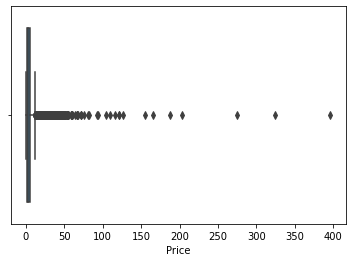

In [13]:
#find outliers!
sns.boxplot(x=df['Price'])

In [14]:
#check for outliers size

df[df.Price > 15]

,Price,city,History,Millage,Ratings,Make,Model,Transmission,Age
32,30.265,Lagos,foreign,76794.0,4.9,Lexus,LX 570,Automatic,3.0
52,23.115,Lagos,foreign,14464.0,5.0,Lexus,RX 350,Automatic,1.0
53,49.515,Lagos,foreign,14855.0,5.0,Land,Rover Range Rover Velar,Automatic,2.0
61,19.265,Lagos,foreign,19444.0,5.0,Lexus,RX 350,Automatic,4.0
128,55.015,Lagos,foreign,18297.0,4.7,Mercedes-Benz,G 63 AMG,Automatic,4.0
...,...,...,...,...,...,...,...,...,...
17439,36.000,Lagos,foreign,49987.0,3.0,Rover,Range Rover Vogue,Automatic,12.0
17442,29.000,Lagos,foreign,23570.0,2.0,Land,Rover Range Rover Sport,Automatic,12.0
17443,16.000,Lagos,foreign,3931.0,1.0,Toyota,Camry,Automatic,12.0
17457,16.500,Lagos,foreign,89582.0,3.0,Lexus,Lx,Automatic,12.0


In [15]:
#drop all columns where Price is zero and greater than 50(million)
df = df.drop(df[df.Price > 15].index)

df = df.drop(df[df.Price <= 0].index)

In [22]:
df.shape

(12245, 9)

<AxesSubplot:xlabel='Price'>

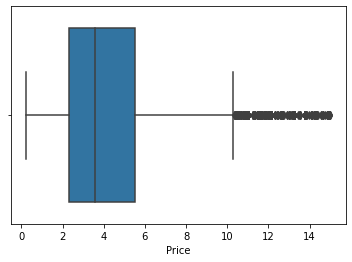

In [17]:
#find outliers!
sns.boxplot(x=df['Price'])

<AxesSubplot:xlabel='Millage'>

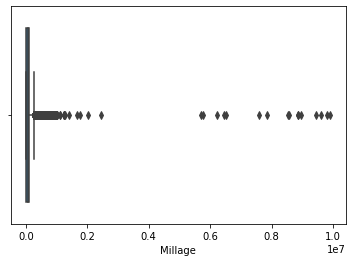

In [18]:
#check out the Millage column
sns.boxplot(x=df['Millage'])

In [19]:
#check for outliers size

df[df.Millage > 200000].shape

(1044, 9)

In [20]:
#drop all columns with Millage more than four hundred thousand km
df = df.drop(df[df.Millage > 200000].index)

In [23]:
df.shape

(12245, 9)

<AxesSubplot:xlabel='Age'>

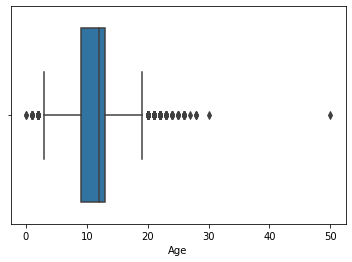

In [24]:
#find outliers in Age!
sns.boxplot(x=df['Age'])

In [25]:
#drop all age greater than 20

df[df.Age > 20].shape

(182, 9)

In [26]:
#drop Age greater than 20

df = df.drop(df[df.Age > 20].index)

In [27]:
df.shape

(12063, 9)

In [28]:
#split the data
X = df.drop(['Price'], axis=1)
y = df['Price']  #target variable

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42,shuffle=True)
X_train.describe()

,Millage,Ratings,Age
count,10253.000000,10253.000000,10253.000000
mean,51392.566858,2.371989,11.257973
std,53736.626978,0.940773,3.321836
min,0.000000,0.000000,0.000000
25%,0.000000,2.000000,9.000000
50%,47799.000000,2.000000,12.000000
75%,87000.000000,2.000000,13.000000
max,200000.000000,5.000000,20.000000


In [29]:
#to display results
results = X_test

In [30]:
X_train.head()

,city,History,Millage,Ratings,Make,Model,Transmission,Age
12373,Lagos,foreign,71212.0,2.0,Toyota,Venza,Automatic,9.0
7170,Rivers,foreign,0.0,2.0,Toyota,Corolla,Automatic,20.0
17241,Lagos,local,164184.0,2.0,Toyota,Land Cruiser,Automatic,12.0
14316,Abuja,local,143420.0,5.0,Mazda,626,Manual,12.0
597,Lagos,foreign,98000.0,2.0,Toyota,FJ,Automatic,12.0


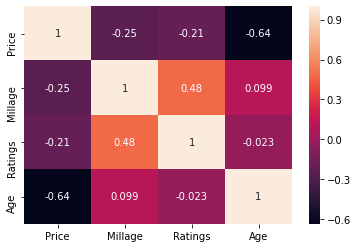

In [22]:
sns.heatmap(df.corr(),annot=True)

In [23]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

norm_cols = ['Millage','Ratings','Age']

# fit scaler on training data
norm = MinMaxScaler().fit(X_train[norm_cols])

# transform training data
X_train.loc[:,norm_cols] = norm.transform(X_train[norm_cols])

# transform testing data
X_test.loc[:,norm_cols] = norm.transform(X_test[norm_cols])

In [24]:
#transform training data
#y_train=(y_train-y_train.mean())/y_train.std()

#y_test = norm_y.transform(y_test)
#y_test=(y_test-y_test.mean())/y_test.std()

In [25]:
X_train.describe()

,Millage,Ratings,Age
count,10253.000000,10253.000000,10253.000000
mean,0.256963,0.474398,0.562899
std,0.268683,0.188155,0.166092
min,0.000000,0.000000,0.000000
25%,0.000000,0.400000,0.450000
50%,0.238995,0.400000,0.600000
75%,0.435000,0.400000,0.650000
max,1.000000,1.000000,1.000000


In [1]:
X_train.head(5)

NameError: name 'X_train' is not defined

In [26]:
X_test.shape

(1810, 8)

In [27]:
#One Hot encoding for History and Transmission

ohe = ce.OneHotEncoder(cols=['History','Transmission'])  #instantiate the one-hot encoder

X_train = ohe.fit_transform(X_train)  #fit and transform ohe

X_test = ohe.transform(X_test)

In [28]:
# encodings for city, Make and Model

base_encoder = ce.BaseNEncoder(cols=['city','Make','Model'],base=3)

# fit and transform and you will get the encoded data
X_train = base_encoder.fit_transform(X_train)

X_test = base_encoder.transform(X_test)

In [29]:
X_train.shape

(10253, 24)

### Model Development & grid Search CV

##### K-Nearest Neigbours

In [62]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()

parameters = {'n_neighbors' : [5,6,7,8,9]}

clf = GridSearchCV(knn, parameters,n_jobs=-1,scoring='r2',cv=3)

clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 6, 7, 8, 9]}, scoring='r2')

In [63]:
clf.cv_results_

{'mean_fit_time': array([0.1436913 , 0.20345815, 0.20761935, 0.1871527 , 0.1840477 ]),
 'std_fit_time': array([0.02982816, 0.01341492, 0.01497516, 0.00418935, 0.02427763]),
 'mean_score_time': array([1.28854863, 1.2812175 , 1.23537779, 1.15099589, 1.12204488]),
 'std_score_time': array([0.01637199, 0.00936832, 0.08132785, 0.02672   , 0.00942987]),
 'param_n_neighbors': masked_array(data=[5, 6, 7, 8, 9],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7},
  {'n_neighbors': 8},
  {'n_neighbors': 9}],
 'split0_test_score': array([0.662756  , 0.66175043, 0.65610733, 0.65037358, 0.64468887]),
 'split1_test_score': array([0.67106597, 0.67724349, 0.66963167, 0.66331786, 0.66026304]),
 'split2_test_score': array([0.64366785, 0.64557461, 0.6472986 , 0.64952312, 0.64800399]),
 'mean_test_score': array([0.65916327, 0.66152284, 0.6576792 , 0.65440485, 0.6509853 ]),
 '

In [34]:
print(knn_scores['test_r2'])

[0.69931779 0.68274599 0.6624519  0.64694839 0.64069253]


In [35]:
knn.fit(X_train,y_train)

y_test_knn = knn.predict(X_test)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_test,y_test_knn)))
print('The r2_error is {}'.format(r2_score(y_test,y_test_knn)))

The mean_absolute error is 0.8998318097605893
The r2_error is 0.7703822462973084


##### Gradient Boosted Trees

In [69]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(objective='reg:squarederror'
                        ,n_jobs=-1) #xgboost

parameters = {'n_estimators' : [800,900],'max_depth':[4,5,6],'learning_rate' : [0.08]}

clf_xgb = GridSearchCV(xgbr, parameters,n_jobs=-1,scoring='r2',cv=3)

clf_xgb.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=XGBRegressor(objective='reg:squarederror'),
             n_jobs=-1,
             param_grid={'learning_rate': [0.08], 'max_depth': [4, 5, 6],
                         'n_estimators': [800, 900]},
             scoring='r2')

In [70]:
clf_xgb.cv_results_

{'mean_fit_time': array([16.38601359, 18.63465373, 20.3996884 , 25.48062221, 25.93436376,
        18.65662837]),
 'std_fit_time': array([0.06805416, 0.20574642, 1.6216693 , 0.05141229, 0.04889293,
        6.13038594]),
 'mean_score_time': array([0.1994698 , 0.23762592, 0.26174704, 0.32107941, 0.27864472,
        0.22357066]),
 'std_score_time': array([0.0096985 , 0.01001625, 0.01934887, 0.01200968, 0.0281683 ,
        0.01766727]),
 'param_learning_rate': masked_array(data=[0.08, 0.08, 0.08, 0.08, 0.08, 0.08],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[4, 4, 5, 5, 6, 6],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[800, 900, 800, 900, 800, 900],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params

In [41]:
xgbr.fit(X_train,y_train)

y_test_xgb = xgbr.predict(X_test)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_test,y_test_xgb)))
print('The r2_error is {}'.format(r2_score(y_test,y_test_xgb)))

The mean_absolute error is 0.8298590450171328
The r2_error is 0.8192040319462518


#### Result Presentation

In [42]:
results.loc[:,'real_price'] = y_test*1000000
results.loc[:,'predicted_price'] = y_test_xgb*1000000
#results[['upper','lower']] = predictions[['upper','lower']]*1000000

# inverse_transform testing data
results.loc[:,norm_cols] = norm.inverse_transform(results[norm_cols])

results.head(20)

,city,History,Millage,Ratings,Make,Model,Transmission,Age,real_price,predicted_price
11446,Lagos,foreign,58963.0,2.0,Toyota,RAV 4,Automatic,7.0,9365000.0,7.357934e+06
14939,Lagos,local,199588.0,4.0,Toyota,Camry,Automatic,12.0,1370000.0,1.353960e+06
9679,Lagos,foreign,83000.0,2.0,Acura,MDX,Automatic,12.0,3645000.0,3.695797e+06
11596,Lagos,foreign,0.0,2.0,Toyota,Camry,Automatic,9.0,4085000.0,3.906697e+06
12358,Lagos,foreign,0.0,2.0,Toyota,Camry,Automatic,20.0,1084500.0,1.187443e+06
16227,Lagos,foreign,97967.0,2.0,Honda,Civic,Automatic,12.0,1850000.0,2.177074e+06
8298,Lagos,foreign,0.0,2.0,Toyota,Camry,Automatic,12.0,2430000.0,3.171012e+06
5117,Lagos,foreign,0.0,2.0,Mercedes-Benz,ML 350,Automatic,10.0,5295000.0,6.106738e+06
15526,Abuja,local,188576.0,3.0,BMW,ALPINA,Automatic,12.0,6910000.0,3.597258e+06
11710,Lagos,foreign,0.0,2.0,Toyota,Camry,Automatic,10.0,4140000.0,3.616149e+06


In [43]:
#next 
# grid search CV for the gradient boosted predictor.
#make range predictions

In [44]:
# #build a range predictor
# from sklearn.ensemble import GradientBoostingRegressor

# # Set lower and upper quantile
# LOWER_ALPHA = 0.1
# UPPER_ALPHA = 0.9

# # Each model has to be separate
# lower_model = GradientBoostingRegressor(loss="quantile",alpha=LOWER_ALPHA,max_depth=5,
#                                         criterion='friedman_mse',learning_rate=0.1,n_estimators=1000)

# # The mid model will use the default loss
# mid_model = GradientBoostingRegressor(loss="ls",max_depth=5,
#                                         criterion='friedman_mse',learning_rate=0.1,n_estimators=1000)

# upper_model = GradientBoostingRegressor(loss="quantile", alpha=UPPER_ALPHA,max_depth=5,
#                                         criterion='friedman_mse',learning_rate=0.1,n_estimators=1000)


# # Fit models
# lower_model.fit(X_train, y_train)
# mid_model.fit(X_train, y_train)
# upper_model.fit(X_train, y_train)

# # Record actual values on test set
# predictions = pd.DataFrame(y_test)

# # Predict
# predictions['lower'] = lower_model.predict(X_test)
# predictions['mid'] = mid_model.predict(X_test)
# predictions['upper'] = upper_model.predict(X_test)